In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def IQR_outliers(x):
    q1 = x.quantile(0.25)
    median = x.quantile(0.5)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    upper_fence = q3 + 1.5*iqr
    lower_fence = q1 - 1.5*iqr
    outliers = x.loc[(x > upper_fence) | (x < lower_fence)]
    return outliers

In [3]:
def zscore_outliers(x):
    mean = np.mean(x)
    std = np.std(x)
    thres = 3
    outliers = x.loc[np.abs((x-mean) / std)>thres]
    return outliers

In [4]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = './AirQualityUCI_refined.csv'

df = pd.read_csv(input_file, index_col=[0], parse_dates=[0], date_parser=parser)
NOx = df['PT08.S3(NOx)'].copy()
NOx.interpolate(inplace=True)

In [5]:
i_outliers = IQR_outliers(NOx)
z_outliers = zscore_outliers(NOx)
i_mask = NOx.index.isin(i_outliers.index)
z_mask = NOx.index.isin(z_outliers.index)

Text(0.5, 1.0, 'z-score outliers')

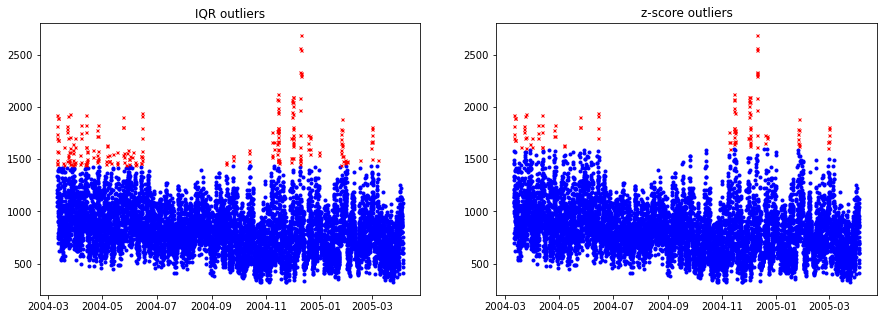

In [6]:
plt.figure(figsize=(15,5))
plt.title("Outliers")
plt.subplot(1,2,1); plt.plot(NOx[~i_mask], label='normal', color='blue',marker='o', markersize=3, linestyle='None')
plt.plot(i_outliers, label='outliers', color='red',marker='x', markersize=3, linestyle='None')
plt.title("IQR outliers")

plt.subplot(1,2,2); plt.plot(NOx[~z_mask], label='normal', color='blue',marker='o', markersize=3, linestyle='None')
plt.plot(z_outliers, label='outliers', color='red',marker='x', markersize=3, linestyle='None')
plt.title("z-score outliers")